## <span style='color:lightgreen;'>WHAT IS IMAGE ENHANCEMENT?</span>  
การปรับปรุงภาพคือ กระบวนการปรับปรุงคุณภาพและความสวยงามของภาพโดยการปรับเปลี่ยนคุณลักษณะของภาพ ซึ่งอาจเกี่ยวข้องกับเทคนิคต่างๆ ที่มุ่งทำให้ภาพเหมาะสมกับการแสดงผลหรือการวิเคราะห์เพิ่มเติม เป้าหมายหลักคือการเน้นรายละเอียดเฉพาะและลดหรือกำจัดองค์ประกอบที่ไม่จำเป็น
### <span style='color:lightblue;'>TECHNIQUES AND METHODS</span>  
เทคนิคการปรับปรุงภาพแบ่งออกเป็น 2 กลุ่มใหญ่: Spatial Domain และ Frequency Domain

<b> <span style='color:yellow;'>Spatial Domain Techniques</span></b>
These techniques involve direct manipulation of the pixels in an image. Some common spatial domain techniques include:
1. <b> <span style='color:orange;'>Point Operations (Intensity Transformations):</span></b> ใช้การแปลงค่าเดียวกันกับแต่ละพิกเซล โดยไม่ขึ้นกับตำแหน่งหรือพิกเซลข้างเคียง
2. <b> <span style='color:orange;'>Spatial Filters:</span></b>  ปรับค่าพิกเซลตามค่าของพิกเซลข้างเคียง ตัวอย่าง: Smoothing (ลดความสิ่งปนเปื้อน), Sharpening (เพิ่มความคมชัด)

### <span style='color:yellow;'>A  NEGATIVE TRANSFORMATION</span>  
In image processing, a negative transformation is a technique that inverts the colors of an image. Essentially, it creates a photographic negative of the original image. This process involves converting each pixel's value in the image to its inverse value within the available range.
For a grayscale image, where pixel values typically range from 0 (black) to 255 (white), the negative transformation is calculated as follows:      <span style='color: lightgreen;'>Negative(I)=255−I</span> 

- **I** = ค่าความเข้มของพิกเซลต้นฉบับ (0-255)
- **Negative(I)** = ค่าความเข้มของพิกเซลในภาพเนกาทีฟ

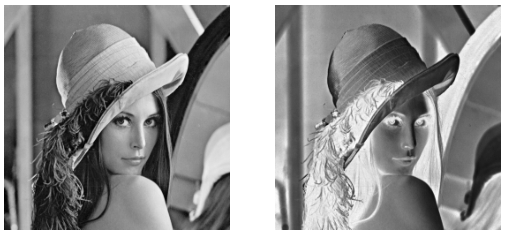

**ตัวอย่างค่า:**
```
ค่าเดิม (I)    →  ค่าเนกาทีฟ (255 - I)
0 (ดำ)         →  255 (ขาว)
50             →  205
100            →  155
150            →  105
200            →  55
255 (ขาว)      →  0 (ดำ)
```

---

## <span style='color:lightblue;'>LET'S START</span>  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### <span style='color:lightgreen;'>READ GRAY-LEVEL IMAGE</span>  

In [2]:
img = cv2.imread("./images/cortex.png", cv2.IMREAD_GRAYSCALE)

In [3]:
print(type(255), type(img))

<class 'int'> <class 'numpy.ndarray'>


### <span style='color:lightgreen;'>METHOD I OF NEGATIVE TRANSFORM</span>  

(443, 443) (443, 443)


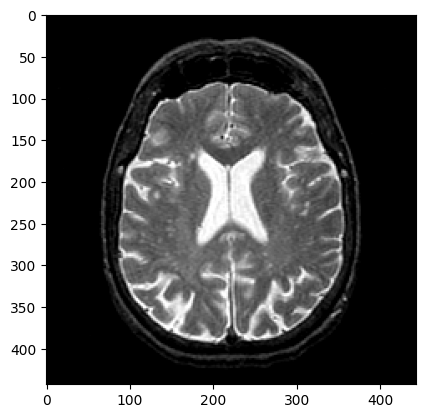

In [4]:
neg1 = 255 - img # เป็นการลบค่าพิกเซลจาก 255 เพื่อสลับสีภาพ
print(neg1.shape, img.shape)
plt.imshow(img , cmap='gray')
plt.show()

In [5]:
cv2.imshow("test",neg1)
cv2.waitKey()
cv2.destroyAllWindows()



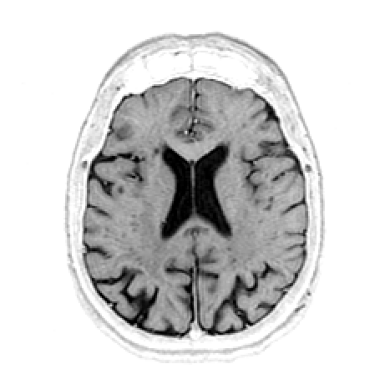

In [6]:
plt.imshow(neg1, cmap='gray')
plt.axis('off')
plt.show()

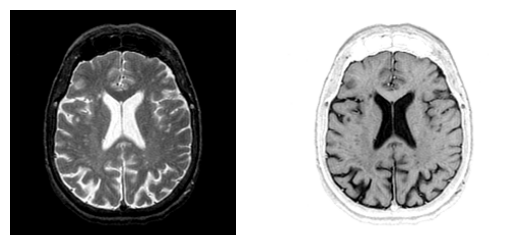

In [ ]:
fig = plt.figure()
fig.add_subplot(1, 2, 1) # row . col . position
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(neg1, cmap='gray')
plt.axis('off')

plt.show()
#plt.savefig('./outs/fig_negs.png')

In [7]:
print(img.shape)

(443, 443)


### <span style='color:lightgreen;'>METHOD II OF NEGATIVE TRANSFORM</span>  

In [8]:
neg2 = np.zeros_like(img, dtype='uint8')
row, col = img.shape

In [9]:
for i in range(row):
    for j in range(col):
        neg2[i,j] = 255 - img[i,j]

In [10]:
print(img.shape)

(443, 443)


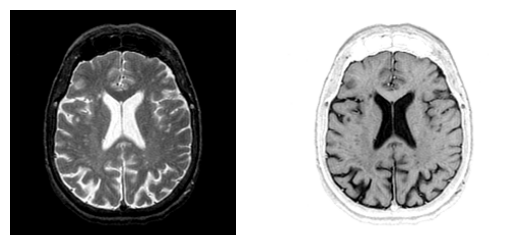

In [11]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(neg2, cmap='gray')
plt.axis('off')

plt.show()

### <span style='color:lightblue;'>A NEGATIVE TRANSFORM OF COLOR IMAGE</span>  
For a color image, this transformation is applied separately to each of the color channels (Red, Green, and Blue). So, if a pixel in the original color image has the RGB values as  (<em><span style='color:lightgreen;'>R,G,B</span> </em>), its negative will have the RGB values (<em><span style='color:lightgreen;'>255-R,255-G,255-B</span> </em>). This technique is often used for visual effect, to enhance certain details that might be less noticeable in the original image, or in certain applications such as medical imaging where it can help in identifying specific features.

In [16]:
img = cv2.imread("./images/lena.png")
b, g, r = cv2.split(img)

In [ ]:
# spit 1 ภาพเป็น 3 channel
# ลบแต่ละ channel จาก 255
# merge channel กลับเป็นภาพใหม่

b_neg = 255 - b
g_neg = 255 - g
r_neg = 255 - r
neg = cv2.merge((b_neg,g_neg,r_neg))

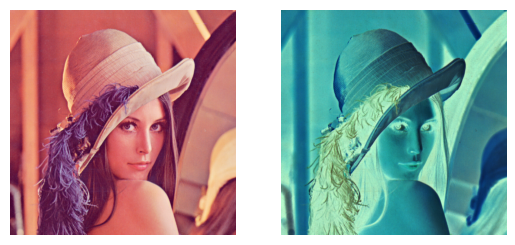

In [18]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(neg, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()